Loading the files and dependencies

In [26]:
import pandas as pd
from matplotlib import dates as mpl_dates 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import math
from datetime import datetime, timedelta 
from jinja2 import Environment, FileSystemLoader

read = pd.read_csv('april.txt', delimiter=',', encoding='utf8', header=None, names=["day", "time", "user", "message"])
#droping the first column because all id values are from the individual day csv files
df = read.reset_index(drop=True)
df

,day,time,user,message
0,2022-04-01,11:11:35,sdcowboy,yyjBaby SmokeTime
1,2022-04-01,11:11:35,th_tony,yyjWiggle yyjWiggle yyjWiggle
2,2022-04-01,11:11:36,뉴미 minu6249,danbi1Nyo danbi1Nyo
3,2022-04-01,11:11:36,utubesux1,yyjWiggle
4,2022-04-01,11:11:36,daryzzy,yyj1 yyj1_HF
...,...,...,...,...
2403912,2022-04-24,5:52:05,Moryttz,KEKBye
2403913,2022-04-24,5:52:05,afiqo98,peepoClap
2403914,2022-04-24,5:52:06,DarkScarlatti,@SlyF0X__ yyjHey yyjL PotFriend see ya later ...
2403915,2022-04-24,5:52:06,bennymiaka,Kissahomie @Chat Kissahomie @Chat


Sumary about the file

In [27]:
df.describe()

,day,time,user,message
count,2403917,2403914,2403917,2396375
unique,19,96689,36194,987866
top,2022-04-21,01:50:43,allexxx1996,KEKW
freq,249894,154,53971,47830


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403917 entries, 0 to 2403916
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   day      object
 1   time     object
 2   user     object
 3   message  object
dtypes: object(4)
memory usage: 73.4+ MB


Declaring a formula for current date 

In [29]:
today = datetime.today()
d2 = today.strftime("%B %d, %Y")
timestr = today.strftime("%Y-%m-%d")

A little sumary about gifted subs, timeouts, and bans 

In [30]:
emptyvalues = df[pd.isnull(df).any(axis=1)]
subscribed_at_Tier_1 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 1")]
Total_tier1 = subscribed_at_Tier_1['user'].count()
subscribed_at_Tier_2 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 2")]
Total_tier2 = subscribed_at_Tier_2['user'].count()
subscribed_at_Tier_3 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 3")]
Total_tier3 = subscribed_at_Tier_3['user'].count()
subscribed_with_prime = emptyvalues[emptyvalues.user.str.contains("subscribed with Prime")]
Total_prime = subscribed_with_prime['user'].count()
gifted_subs = emptyvalues[emptyvalues.user.str.contains("gifted")]
Total_gifted = gifted_subs['user'].count()
timed_out_for = emptyvalues[emptyvalues.user.str.contains("timed out for")]
Total_time_out = timed_out_for['user'].count()
banned_from_this_channel  = emptyvalues[emptyvalues.user.str.contains("been permanently banned")]
Total_bans = banned_from_this_channel['user'].count()
d = {'Description': ["Subscribed at Tier 1", "Subscribed at Tier 2", "Subscribed at Tier 3", "Subscribed with Prime", "Gifted", "Timed Outs", "banned"], 'Total': [Total_tier1, Total_tier2, Total_tier3, Total_prime, Total_gifted, Total_time_out, Total_bans]}
moreData = pd.DataFrame(data=d)
moreData

,Description,Total
0,Subscribed at Tier 1,707
1,Subscribed at Tier 2,16
2,Subscribed at Tier 3,20
3,Subscribed with Prime,508
4,Gifted,5176
5,Timed Outs,800
6,banned,84


Top emotes

In [31]:
clean_wothoutNA = df.dropna()
most_used_words = pd.Series(' '.join(clean_wothoutNA['message']).split()).value_counts()[:70].reset_index()
clean1 = most_used_words.replace('󠀀', np.nan, regex=True)
text_withoutNan = clean1.dropna(axis='rows').replace({'\'':''}, {')':''}, regex=True)
text_withoutNan

#define values
values = ["The", "the", 'it', 'be', 'is', 'you', 'a', 'to', 'no', 'in', 'that', 'she', 'this', 'for', 
          'not', 'good', 'I', 'on', 'and', 'i', '1', '2', 'Lmao', 'Lol', "You", 'like', 'just', 'its', '?', 'lol', 'all', 'so', 'will',
          'of', 'are', 'they', 'bye', '⠀', 'yes', 'he', 'can', '11', 'go', 'him', 'your', 'back', 'her', 'D', 'u', 'do', 'take', 'need', 
          'more', 'why', 'have', 'what', 'with', 'dont', 'get', 'eat', 'drink', "jinny", "was", "my", "we"
          ,"nice", "too", "me", "one", "yuggie", "at", "how", "it\'s", "ye", "yea", "!bet", "hair", "milk", "🥕", "wind",
          "S", "yeah", "ok", "mode", "water", "there", "drone"]

#drop rows that contain any value in the list
textwithoutmostusedwords = text_withoutNan[text_withoutNan['index'].isin(values) == False]

#another way to search for most used words 
#df.message.value_counts().reset_index()

#--------------------------------------------------Saving in a document----------------------------------------------------------------
savetextwithoutmostusedwords = textwithoutmostusedwords.to_csv("topemotes.txt", sep=' ', header=False, index=False)
#--------------------------------------------------------------------------------------------------------------------------------------

Cleanreadytop20chatters = pd.read_csv("topemotes.txt", delimiter=' ', encoding='utf8', header=None, names=["Emote", "Times Used"])
Cleanreadytop20chatters

,Emote,Times Used
0,KEKW,76432
1,LUL,66438
2,YEP,59001
3,xar2EDM,53596
4,yyjPog,50060
5,yyjWiggle,49458
6,PepeLaugh,46066
7,Clap,39371
8,yyjL,35847
9,yyjHey,33851


Top chatters with their most used emote

In [33]:
top20Chatters = df.user.value_counts()[:20].reset_index()
nametop_1 = [None] * 20
Searching_by_User_top_1 = [None] * 20
Searching_by_UserTop_1_emote = [None] * 20
textwithoutmostusedwords_byuser1 = [None] * 20
topemotefromtop1chatter = [None] * 20
howManyTimesWasUsedThe_topemotefrom_top1chatter = [None] * 20
topemotefromtop_1chatter_second_emote = [None] * 20
howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote = [None] * 20

for m in range(20):
    nametop_1[m] = top20Chatters.loc[m, 'index']
    Searching_by_User_top_1[m] = df[(df["user"] == nametop_1[m]) & (df["message"] )]
    Searching_by_UserTop_1_emote[m] = pd.Series(' '.join(Searching_by_User_top_1[m]['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
    textwithoutmostusedwords_byuser1[m] = Searching_by_UserTop_1_emote[m][Searching_by_UserTop_1_emote[m]['index'].isin(values) == False].reset_index()
    topemotefromtop1chatter[m] = textwithoutmostusedwords_byuser1[m].loc[0, 'index']
    howManyTimesWasUsedThe_topemotefrom_top1chatter[m] = textwithoutmostusedwords_byuser1[m].loc[0,0]
    topemotefromtop_1chatter_second_emote[m] = textwithoutmostusedwords_byuser1[m].loc[1, 'index']
    howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote[m] = textwithoutmostusedwords_byuser1[m].loc[1,0]


In [34]:
tota_unique_chatters = len(df.user.value_counts())
tota_unique_chatters

36194

In [35]:
first_message = datetime.strptime(df.time.iloc[1], '%H:%M:%S')
last_message = datetime.strptime(df.time.iloc[-1], '%H:%M:%S')
Total_Hours_streamed = last_message - first_message
print(Total_Hours_streamed)

-1 day, 18:40:31


In [36]:

#total messages
topChatters = df.user.value_counts().reset_index()
totalChatters = int(topChatters['user'].sum())
plot_index_Totalmsg = str('Total Messages ') +  str(totalChatters)
#total 20 chatters
top20Chatters = df.user.value_counts()[:20].reset_index()
totalTop20Chatters = int(top20Chatters['user'].sum())
percentageTop20Chatter = round(((totalTop20Chatters / totalChatters) * 100) , 2)
plot_index_top20 = str('Percentage of Top 20 ') +  str(percentageTop20Chatter)
#total 5 chatters
top5Chatters = df.user.value_counts()[:5].reset_index()
totalTop5Chatters = int(top5Chatters['user'].sum())
percentageTop5Chatter = round(((totalTop5Chatters / totalChatters) * 100) , 2)
plot_index_top5 = str('Percentage of Top 5 ') +  str(percentageTop5Chatter) 

top20Chatters['Most used emote by user'] = pd.Series(topemotefromtop1chatter)

top20Chatters['Times used'] = pd.Series(howManyTimesWasUsedThe_topemotefrom_top1chatter)

top20Chatters['Second most used emote by user'] = pd.Series(topemotefromtop_1chatter_second_emote)

top20Chatters['Total for second emote'] = pd.Series(howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote)

top20Chatters.to_csv('top20Chatters.csv', header=False, index=False,)

notopChatter = totalChatters - totalTop20Chatters

top20withouttop5 = totalTop20Chatters - totalTop5Chatters




top chatters of April 26, 2022
Messages logged = 2403917
Sum of total 20 messages = 419221
Perentage of Top 20 chatters = 17.44
Sum of total 5 messages = 179487
Perentage of Top 5 chatters = 7.47
other messeges 1984696
top 20 with out Top 5 239734
tatal messeges from top 5  179487
total messges 2403917


In [37]:
prueba = clean_wothoutNA.day.value_counts().reset_index()
saving_prueba = prueba.to_csv("prueba.txt", sep=' ', header=False, index=False)
read_saving_prueba = pd.read_csv("prueba.txt", delimiter=' ', encoding='utf8', header=None, names=["Day", "Messages"])

In [38]:
months = read_saving_prueba["Day"].to_numpy()
drop_index_from_Searching_by_User = [len(df[(df["day"] == day)].user.value_counts()) for day in months] 


In [39]:
read_saving_prueba = read_saving_prueba
read_saving_prueba["Chatters"] = pd.Series(drop_index_from_Searching_by_User)
newplot = read_saving_prueba.sort_values(by='Day')

In [40]:
import calendar
calendar.setfirstweekday(6)

def get_week_of_month(year, month, day):
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0] + 1
    return(week_of_month)

cell = [None] * int(len(newplot))
#y = [None] * 25
#m = [None] * 25
d = [None] * int(len(newplot))
for g in range(len(newplot)):
    cell[g] = newplot.loc[g, 'Day']
#    y[g] = cell[g][:4]
#    m[g] = cell[g][5:-3]
    d[g] = cell[g][8:]
#
#weeks = pd.DataFrame(y)  
#weeks['month'] = pd.Series(m)
newplot['day'] = pd.Series(d)



get_week_of_month(2022,3,31) 

5

In [129]:
Week_1 = 1
Week_2 = 3
Week_3 = 10
Week_4 = 17
Week_5 = 24
last_day = 30

def applyFunc(s):
    if s == Week_1 or s < Week_2:
        return "Week 1"
    elif s == Week_2 or s < Week_3:
        return 'Week 2'
    elif s == Week_3 or s < Week_4:
        return 'Week 3'
    elif s == Week_4 or s < Week_5:
        return 'Week 4'
    elif s == Week_5 or s <= last_day:
        return 'Week 5'
    return ''
newplot["Day"] = pd.to_datetime(newplot["Day"])
newplot['day_of_the_week'] = pd.Series(newplot['Day'].dt.day_name())
newplot['day'] = newplot['day'].astype(int)
newplot['Week'] = newplot['day'].apply(applyFunc)
newplot["Day"] = newplot["Day"].dt.strftime('%Y-%m-%d')

newplot.reset_index(drop='index')

,Day,Messages,Chatters,day,day_of_the_week,Week
0,2022-04-01,141232,3575,1,Friday,Week 1
1,2022-04-03,60508,2878,3,Sunday,Week 2
2,2022-04-04,68263,3298,4,Monday,Week 2
3,2022-04-07,8515,900,7,Thursday,Week 2
4,2022-04-08,96757,4374,8,Friday,Week 2
5,2022-04-09,119374,4251,9,Saturday,Week 2
6,2022-04-10,59345,2672,10,Sunday,Week 3
7,2022-04-12,23959,1551,12,Tuesday,Week 3
8,2022-04-13,37381,2014,13,Wednesday,Week 3
9,2022-04-15,166098,5950,15,Friday,Week 3


In [55]:
emotes = Cleanreadytop20chatters['Emote'][:10].to_numpy()
Days = newplot['Day'].to_numpy()

Emote_1 = [len(df[(df["day"] == x) & (df["message"] == emotes[0])]) for x in Days] 
Emote_2 = [len(df[(df["day"] == x) & (df["message"] == emotes[1])]) for x in Days] 
Emote_3 = [len(df[(df["day"] == x) & (df["message"] == emotes[2])]) for x in Days] 
Emote_4 = [len(df[(df["day"] == x) & (df["message"] == emotes[3])]) for x in Days] 
Emote_5 = [len(df[(df["day"] == x) & (df["message"] == emotes[4])]) for x in Days] 
Emote_6 = [len(df[(df["day"] == x) & (df["message"] == emotes[5])]) for x in Days] 
Emote_7 = [len(df[(df["day"] == x) & (df["message"] == emotes[6])]) for x in Days] 
Emote_8 = [len(df[(df["day"] == x) & (df["message"] == emotes[7])]) for x in Days] 
Emote_9 = [len(df[(df["day"] == x) & (df["message"] == emotes[8])]) for x in Days] 
Emote_10 = [len(df[(df["day"] == x) & (df["message"] == emotes[9])]) for x in Days] 

In [127]:
#Top 10 emotes 
Day_of_the_list  = [None] * int(len(Days))
list_of_emotes  = [None] * int(len(Days))
clean_list_of_emotes  = [None] * int(len(Days))
how_many_times_was_used_emote_1  = [None] * int(len(Days))
how_many_times_was_used_emote_2  = [None] * int(len(Days))
how_many_times_was_used_emote_3  = [None] * int(len(Days))
how_many_times_was_used_emote_3  = [None] * int(len(Days))
how_many_times_was_used_emote_4  = [None] * int(len(Days))
how_many_times_was_used_emote_5  = [None] * int(len(Days))
how_many_times_was_used_emote_6  = [None] * int(len(Days))
how_many_times_was_used_emote_7  = [None] * int(len(Days))
how_many_times_was_used_emote_8  = [None] * int(len(Days))
how_many_times_was_used_emote_9  = [None] * int(len(Days))
how_many_times_was_used_emote_10  = [None] * int(len(Days))
for x in range(len(Days)):
    Day_of_the_list[x] =  clean_wothoutNA[(clean_wothoutNA["day"] == Days[x])]
    list_of_emotes[x] = pd.Series(' '.join(Day_of_the_list[x]['message']).split()).reset_index()
    how_many_times_was_used_emote_1[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[0])])
    how_many_times_was_used_emote_2[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[1])])
    how_many_times_was_used_emote_3[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[2])])
    how_many_times_was_used_emote_4[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[3])])
    how_many_times_was_used_emote_5[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[4])])
    how_many_times_was_used_emote_6[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[5])])
    how_many_times_was_used_emote_7[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[6])])
    how_many_times_was_used_emote_8[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[7])])
    how_many_times_was_used_emote_9[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[8])])
    how_many_times_was_used_emote_10[x] = len(list_of_emotes[x][(list_of_emotes[x][0] == emotes[9])])

#dataframe
Emotes_tablr_used_per_day = pd.DataFrame({'Day' : Days})
Emotes_tablr_used_per_day[emotes[0]] = pd.Series(how_many_times_was_used_emote_1)
Emotes_tablr_used_per_day[emotes[1]] = pd.Series(how_many_times_was_used_emote_2)
Emotes_tablr_used_per_day[emotes[2]] = pd.Series(how_many_times_was_used_emote_3)
Emotes_tablr_used_per_day[emotes[3]] = pd.Series(how_many_times_was_used_emote_4)
Emotes_tablr_used_per_day[emotes[4]] = pd.Series(how_many_times_was_used_emote_5)
Emotes_tablr_used_per_day[emotes[5]] = pd.Series(how_many_times_was_used_emote_6)
Emotes_tablr_used_per_day[emotes[6]] = pd.Series(how_many_times_was_used_emote_7)
Emotes_tablr_used_per_day[emotes[7]] = pd.Series(how_many_times_was_used_emote_8)
Emotes_tablr_used_per_day[emotes[8]] = pd.Series(how_many_times_was_used_emote_9)
Emotes_tablr_used_per_day[emotes[9]] = pd.Series(how_many_times_was_used_emote_10)
Emotes_tablr_used_per_day


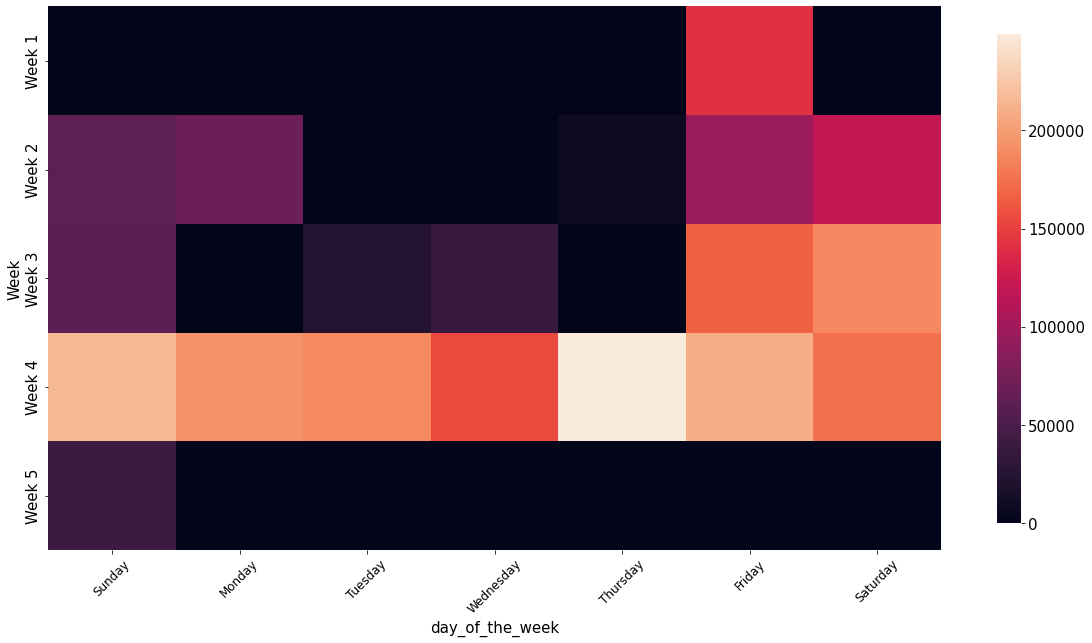

In [44]:
heatmap = newplot.pivot_table(index="Week", columns="day_of_the_week", values="Messages").fillna(0)
week_pivot = heatmap.reindex(columns=['Sunday','Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday'])
week_messeges_heatmap = plt.figure(figsize = (20,10))
week_messeges_heatmap = sns.heatmap(week_pivot, annot=False, cbar_kws={'shrink': 0.9})
week_messeges_heatmap = plt.xticks(fontsize=12, rotation=45)
week_messeges_heatmap = plt.yticks(fontsize=15)

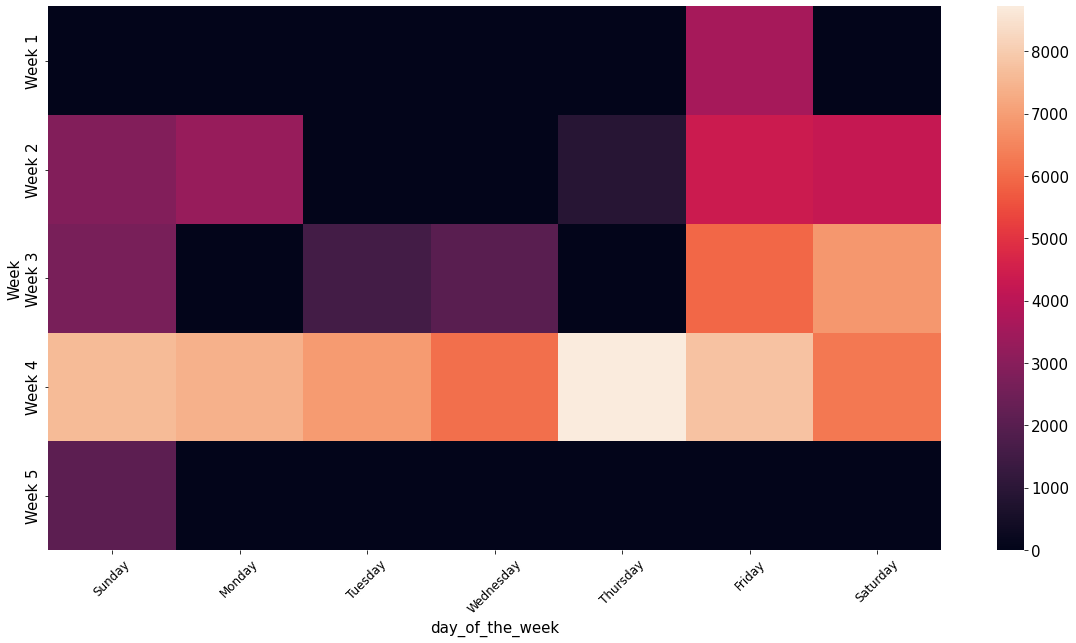

In [45]:
chatters_heatmap = newplot.pivot_table(index="Week", columns="day_of_the_week", values="Chatters").fillna(0)
chatters_heatmap = chatters_heatmap.reindex(columns=['Sunday','Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday'])
week_chatters_heatmap = plt.figure(figsize = (20,10))
week_chatters_heatmap = sns.heatmap(chatters_heatmap, annot=False)
week_chatters_heatmap = plt.xticks(fontsize=12, rotation=45)
week_chatters_heatmap = plt.yticks(fontsize=15)

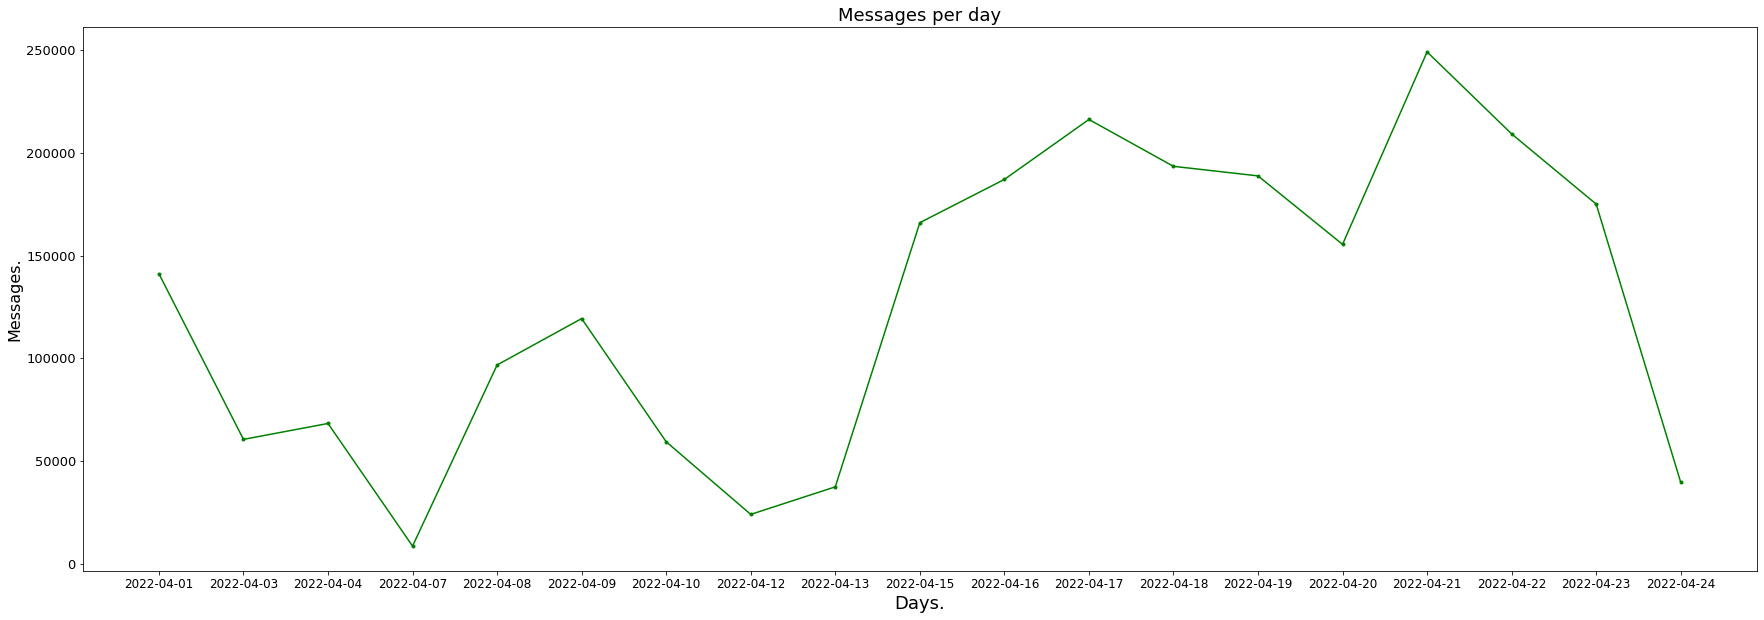

In [46]:
chart_messeges_per_day = plt.figure(figsize=(30,10))
chart_messeges_per_day = plt.plot(newplot.Day, newplot.Messages, "g.-")
chart_messeges_per_day = plt.title("Messages per day")
chart_messeges_per_day = plt.xlabel('Days.', fontsize=18)
chart_messeges_per_day = plt.ylabel('Messages.', fontsize=16)
chart_messeges_per_day = plt.xticks(fontsize=12, rotation=360)
chart_chatters_per_day = plt.yticks(fontsize=13)
chart_messeges_per_day = plt.show()

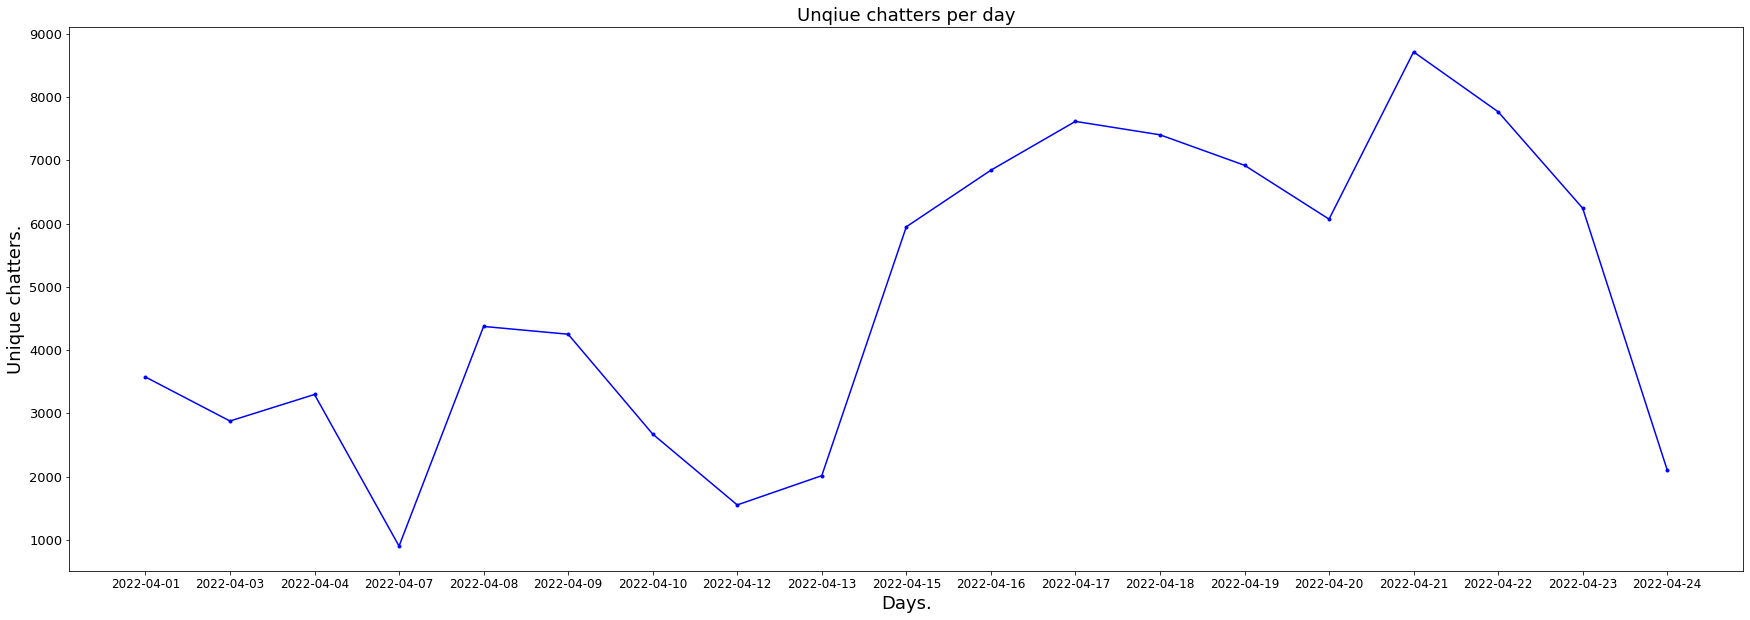

In [47]:
chart_chatters_per_day = plt.figure(figsize=(30,10))
chart_chatters_per_day = plt.plot(newplot.Day, newplot.Chatters, "b.-")
chart_chatters_per_day = plt.title("Unqiue chatters per day")
chart_chatters_per_day = plt.xlabel('Days.', fontsize=18)
chart_chatters_per_day = plt.ylabel('Unique chatters.', fontsize=18)
chart_chatters_per_day = plt.xticks(fontsize=12, rotation=360)
chart_chatters_per_day = plt.yticks(fontsize=13)
chart_chatters_per_day = plt.show()

In [48]:
readytop20chatters = pd.read_csv('top20Chatters.csv', encoding='utf8', header=None, names=["User", "Total", "Most used emote", "Times used", "Second most used emote", "Times used 2"])
readytop20chatters['Top'] = pd.Series(["1", "2", "3", "4", "5", "6","7","8","9","10","11","12","13","14","15", "16", "17", "18", "19", "20"])
readytop20chatters = readytop20chatters[['Top', "User", "Total", "Most used emote", "Times used", "Second most used emote", "Times used 2"]]

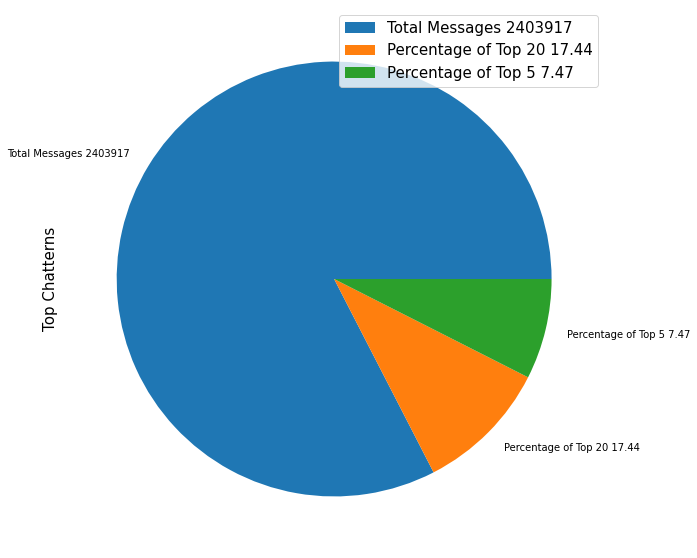

In [49]:
plt.rcParams['font.size'] = 15
top_chatters_frame = pd.DataFrame({'Top Chatterns' : [notopChatter, top20withouttop5, totalTop5Chatters]}, index=[plot_index_Totalmsg, plot_index_top20, plot_index_top5])
top_chatters_frame
plot = top_chatters_frame.plot.pie(y='Top Chatterns', figsize=(10, 10), fontsize=10)
plt.savefig('plot')

In [50]:
# 2. Create a template Environment
env = Environment(loader=FileSystemLoader('templates'))

# 3. Load the template from the Environment
template = env.get_template('report_template.html')
# 4. Render the template with variables
html = template.render(page_title_text='My_report',
                       title_text='Jinnytty Stream report',
                       Day=d2,
                       top20Chatters_text='Top 20 Chatters',
                       totalChatters=totalChatters,
                       totalTop20Chatters=totalTop20Chatters,
                       percentageTop20Chatter=percentageTop20Chatter,
                       totalTop5Chatters=totalTop5Chatters,
                       percentageTop5Chatter=percentageTop5Chatter,
                       readytop20chatters=readytop20chatters,
                       MostUsedEmote_text='Most used Emote',
                       Cleanreadytop20chatters=Cleanreadytop20chatters,
                       totalChatters_text= totalChatters,
                       totalTop20Chatters_text=totalTop20Chatters,
                       percentageTop20Chatter_text=percentageTop20Chatter,
                       totalTop5Chatters_text=totalTop5Chatters,
                       percentageTop5Chatter_text=percentageTop5Chatter,
                       tota_unique_chatters=tota_unique_chatters,
                       topchatterspie_text='Top Chatters Pie',
)

# 5. Write the template to an HTML file
with open('html_report_jinja.html', 'w', encoding="utf-8") as f:
    f.write(html)